In [1]:
import random
import numpy as np
from numpy.random import randn
import scipy.stats
import os

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

set_seed(seed=42)

## Z -> Yへの因果関係

In [3]:
# データ生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

Z = e_z
# zを入れて関係を仮定する
Y = 2*Z + e_y

In [4]:
# 相関係数
print('相関係数：', np.corrcoef(Z, Y))

相関係数： [[1.         0.89359102]
 [0.89359102 1.        ]]


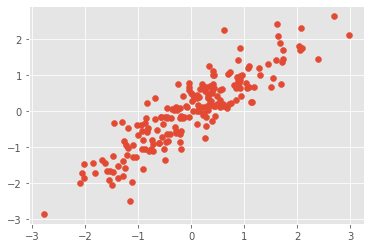

In [5]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

plt.scatter(Z_std, Y_std)

## 擬似相関：因果が逆

相関関係だけでは因果関係の向きはわからないことを確認する

In [6]:
# データ生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

Y = e_y
# zを入れて関係を仮定する
Z = 2*Y + e_z

In [7]:
# 相関係数
print('相関係数：', np.corrcoef(Z, Y))

相関係数： [[1.         0.90817073]
 [0.90817073 1.        ]]


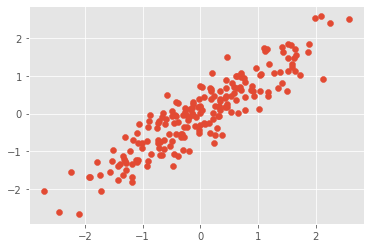

In [8]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

plt.scatter(Z_std, Y_std)

## 擬似相関：交絡

xで交絡している場合を見てみる

In [9]:
# データ生成
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)
e_z = randn(num_data)

Z = 3.3*e_x + e_z
Y = 3.3*e_x + e_y

# 相関係数
print('相関係数：', np.corrcoef(Z, Y))

相関係数： [[1.         0.90986192]
 [0.90986192 1.        ]]


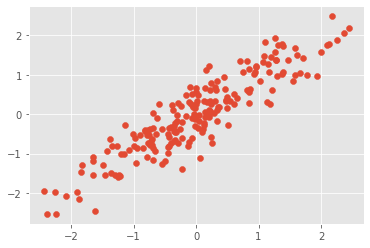

In [10]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

plt.scatter(Z_std, Y_std)

## 擬似相関：合流点での選抜
xとyの和をとって閾値を超える人を合格にするなどといった操作では、xとyに関係がなくても相関関係が出てしまう場合がある

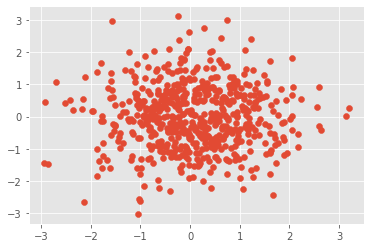

In [11]:
# データ生成
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

x = e_x
y = e_y

# 散布図を描画
plt.scatter(x, y)

In [12]:
# 相関係数
print('相関係数：', np.corrcoef(x, y))

相関係数： [[1.         0.00427135]
 [0.00427135 1.        ]]


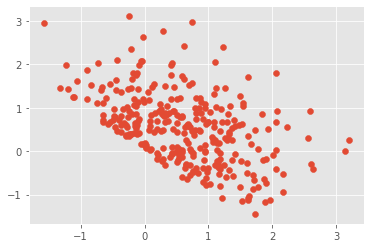

In [13]:
# 合流点z
z = x + y

x_new = np.array([])
y_new = np.array([])

for i in range(num_data):
    if z[i] > 0.0:
        x_new = np.append(x_new, x[i])
        y_new = np.append(y_new, y[i])
        
plt.scatter(x_new, y_new)

In [14]:
# 相関係数
print('相関係数：', np.corrcoef(x_new, y_new))

相関係数： [[ 1.         -0.48450938]
 [-0.48450938  1.        ]]
